In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/h1b_kaggle.csv")
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [ ]:
data.CASE_STATUS.value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

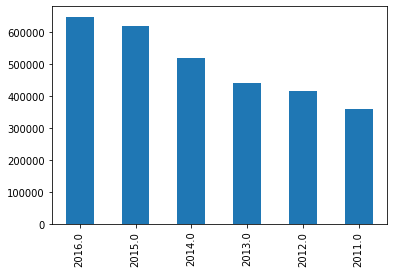

In [ ]:
data.YEAR.value_counts().plot(kind = 'bar')

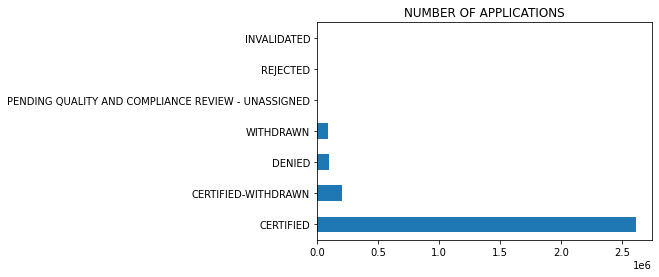

In [ ]:
plt.figure()
data.CASE_STATUS.value_counts().plot(kind='barh')
data.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

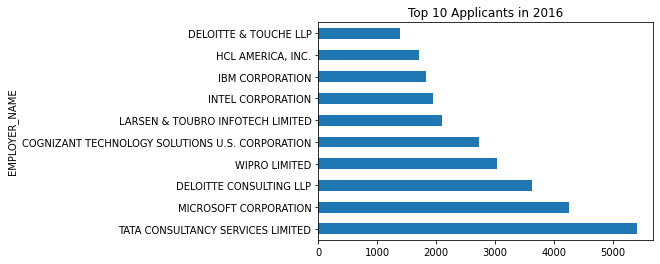

In [ ]:
plt.figure()

ax1 = data['EMPLOYER_NAME'][data['YEAR'] == 2011].groupby(data['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2016")
ax1.set_label("")
plt.show()

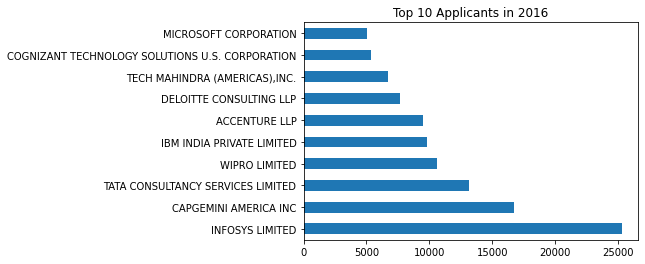

In [ ]:
plt.figure()

ax2 = data['EMPLOYER_NAME'][data['YEAR'] == 2016].groupby(data['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Applicants in 2016'
                                                                                                                             )
ax2.set_ylabel("")
plt.show()

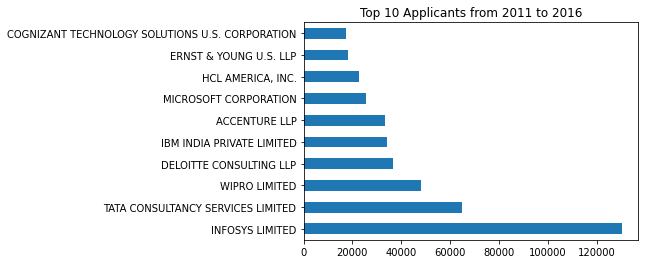

In [ ]:
plt.figure()

ax3 = data['EMPLOYER_NAME'].groupby([data['EMPLOYER_NAME']]).count().sort_values(ascending=False).head(10).plot(kind = 'barh', title = 'Top 10 Applicants from 2011 to 2016')
                                                                                                           
ax3.set_ylabel("")
plt.show()

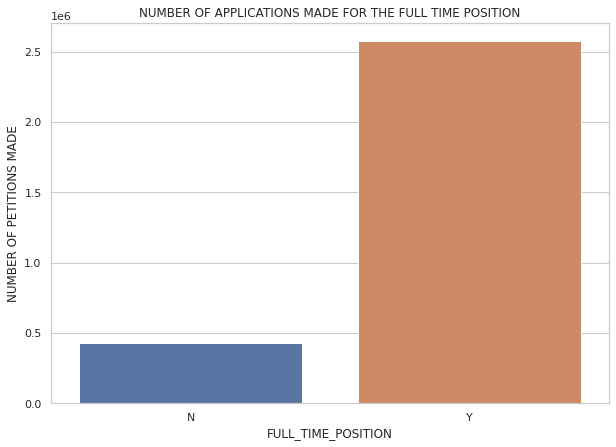

In [ ]:
plt.figure(figsize=(10,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = data)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

In [ ]:
top_emp = list(data['EMPLOYER_NAME'][data['YEAR'] >= 2015].groupby(data['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)

byempyear = data[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][data['EMPLOYER_NAME'].isin(top_emp)]

byempyear = byempyear.groupby([data['EMPLOYER_NAME'], data['YEAR']])

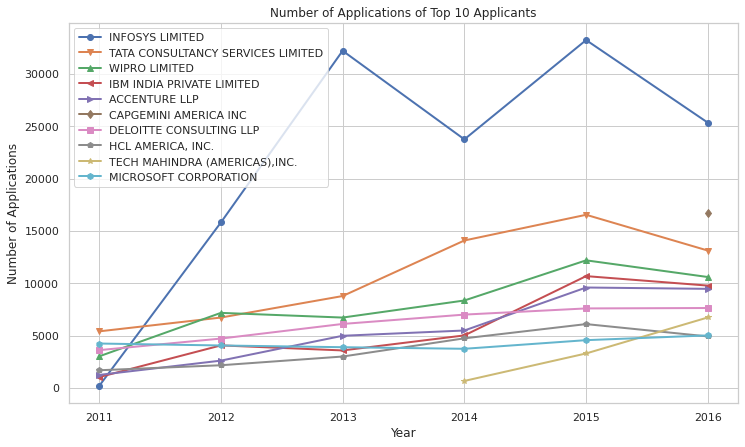

In [ ]:
plt.figure(figsize=(12,7))

markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d',
         's','p','*','h','x','D']

for company in top_emp:
    tmp = byempyear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company,
             linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

**Removing Outliers**

In [ ]:
data = data[data['PREVAILING_WAGE'] <= 500000]
by_emp_year = data[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][data['EMPLOYER_NAME'].isin(top_emp)]
by_emp_year = by_emp_year.groupby([data['EMPLOYER_NAME'],data['YEAR']])

**Checking for null value**

In [ ]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME               17698
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

In [ ]:
data['SOC_NAME'] = data['SOC_NAME'].fillna(data['SOC_NAME'].mode()[0])

In [ ]:
data.isnull().sum()

Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             42
SOC_NAME                   0
JOB_TITLE                 26
FULL_TIME_POSITION         0
PREVAILING_WAGE            0
YEAR                       0
WORKSITE                   0
lon                   107089
lat                   107089
dtype: int64

**Label enconding the CASE_STATUS feature**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['CASE_STATUS']=le.fit_transform(data['CASE_STATUS'])
data['FULL_TIME_POSITION']=le.fit_transform(data['FULL_TIME_POSITION'])
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,1,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,0,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,1,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,1,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,1,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,1,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,1,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",1,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,6,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,1,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [ ]:
import sys
data['SOC_NAME1'] = 'others'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('computer','software')] = 'it'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('chief','management')] = 'manager'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('mechanical')] = 'mechanical'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('database')] = 'database'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('sales','market')] = 'scm'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('financial')] = 'finance'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('public','fundraising')] = 'pr'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('education','law')] = 'administrative'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('auditors','compliance')] = 'audit'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('distribution','logistics')] = 'scm'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('recruiters','human')] = 'hr'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('construction','architectural')] = 'estate'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('forencsic','health')] = 'medical'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('teachers')] = 'education'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
data = data.drop(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME','JOB_TITLE','WORKSITE', 'lon','lat'], axis = 1)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.SOC_NAME1)
data['SOC_N']=le.transform(data['SOC_NAME1'])

In [ ]:
data = data.drop(['SOC_NAME1'], axis=1)

In [ ]:
data

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
0,1,0,36067.0,2016.0,2
1,1,1,242674.0,2016.0,2
2,1,1,193066.0,2016.0,2
3,1,1,220314.0,2016.0,2
4,6,1,157518.4,2016.0,2
...,...,...,...,...,...
3002440,6,1,64800.0,2011.0,2
3002441,6,0,70553.6,2011.0,2
3002442,6,1,33800.0,2011.0,2
3002443,6,1,59800.0,2011.0,2


In [ ]:
x=pd.DataFrame(data.iloc[:,1:5])
x.head()

,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
0,0,36067.0,2016.0,2
1,1,242674.0,2016.0,2
2,1,193066.0,2016.0,2
3,1,220314.0,2016.0,2
4,1,157518.4,2016.0,2


In [ ]:
y=pd.DataFrame(data.iloc[:,0:1])
y.head()

,CASE_STATUS
0,1
1,1
2,1
3,1
4,6


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

**Model Building**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression


In [ ]:
logr=LogisticRegression()
logr.fit(x_train,y_train)
y_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,CASE_STATUS
520002,0
1128791,0
900630,0
1362279,0
1691055,0
...,...
108212,0
1821115,0
826367,0
573076,6


In [ ]:
y_pred_logr=logr.predict(x_test)
y_pred_logr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred_logr)
print(confusion_matrix)

[[784458      0      0      0      0      0]
 [ 60711      0      0      0      0      0]
 [ 27545      0      0      0      0      0]
 [     1      0      0      0      0      0]
 [     6      0      0      0      0      0]
 [ 27253      0      0      0      0      0]]


In [ ]:
acc_logr=accuracy_score(y_test,y_pred_logr)
acc_logr

0.8716451808607805

In [ ]:
print(classification_report(y_test, y_pred_logr))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93    784458
           1       0.00      0.00      0.00     60711
           2       0.00      0.00      0.00     27545
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           6       0.00      0.00      0.00     27253

    accuracy                           0.87    899974
   macro avg       0.15      0.17      0.16    899974
weighted avg       0.76      0.87      0.81    899974



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf =rf.predict(x_test)
print(y_pred_rf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93    784458
           1       0.47      0.09      0.16     60711
           2       0.24      0.04      0.07     27545
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           6       0.15      0.01      0.02     27253

    accuracy                           0.87    899974
   macro avg       0.29      0.19      0.20    899974
weighted avg       0.81      0.87      0.82    899974



In [ ]:
#nav bias
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb=nb.predict(x_test)
y_pred_nb

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_nb)
print(confusion_matrix)

[[779433      0   5025      0      0      0]
 [ 60395      0    316      0      0      0]
 [ 26999      0    546      0      0      0]
 [     0      0      1      0      0      0]
 [     6      0      0      0      0      0]
 [ 27011      0    242      0      0      0]]


In [ ]:
acc_nb=accuracy_score(y_test,y_pred_nb)
acc_nb

0.8666683704195899

In [ ]:
print(classification_report(y_test, y_pred_nb))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.87      0.99      0.93    784458
           1       0.00      0.00      0.00     60711
           2       0.09      0.02      0.03     27545
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           6       0.00      0.00      0.00     27253

    accuracy                           0.87    899974
   macro avg       0.16      0.17      0.16    899974
weighted avg       0.76      0.87      0.81    899974



In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred_knn)

array([[774559,   7136,   2038,      0,      0,    725],
       [ 54813,   5659,    121,      0,      0,    118],
       [ 26378,    329,    799,      0,      0,     39],
       [     1,      0,      0,      0,      0,      0],
       [     6,      0,      0,      0,      0,      0],
       [ 26278,    696,    112,      0,      0,    167]])

In [ ]:
acc_knn=accuracy_score(y_test,y_pred_knn)
acc_knn

0.8680072979886085

In [ ]:
print(classification_report(y_test,y_pred_knn))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93    784458
           1       0.41      0.09      0.15     60711
           2       0.26      0.03      0.05     27545
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           6       0.16      0.01      0.01     27253

    accuracy                           0.87    899974
   macro avg       0.28      0.19      0.19    899974
weighted avg       0.81      0.87      0.82    899974



In [ ]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_dtc=dtc.predict(x_test)
y_pred_dtc

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_dtc)
print(confusion_matrix)

[[776144   4859   2543      0      0    912]
 [ 54889   5526    179      0      0    117]
 [ 26273    251    941      0      0     80]
 [     1      0      0      0      0      0]
 [     5      0      0      0      0      1]
 [ 26295    631    122      0      0    205]]


In [ ]:
acc_dtc=accuracy_score(y_test,y_pred_dtc)
acc_dtc

0.8698206837086405

In [ ]:
print(classification_report(y_test, y_pred_dtc))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93    784458
           1       0.49      0.09      0.15     60711
           2       0.25      0.03      0.06     27545
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           6       0.16      0.01      0.01     27253

    accuracy                           0.87    899974
   macro avg       0.30      0.19      0.19    899974
weighted avg       0.81      0.87      0.82    899974



In [ ]:
import pickle
pickle.dump(logr,open('visa.pkl','wb'))